### 목표
- 타이타닉 데이터를 모델에 학습시켜서 생존/사망 예측해보자
- 머신러닝의 전체 과정을 진행해보자

### 1. 문제 정의
- Kaggle에서 제공하는 titanic 데이터를 사용해 승객의 생존 여부를 예측
- 지도 학습
- Survived 컬럼은 데이터값은 수치형이지만 0,1로 생존 여부만 구분하고 있기 때문에 우선순위는 없음
- 분류

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns # 시각화 도구

# 2. 데이터 수집
- 타이타닉 train데이터와 test데이터를 변수 train, test에 저장하기

In [6]:
train = pd.read_csv('data/train (1).csv', index_col = 'PassengerId')
test = pd.read_csv('data/test (1).csv', index_col = 'PassengerId')

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# 크기 확인
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


### 3. 데이터 전처리 및 데이터 탐색

In [9]:
# 훈련 데이터 셋 정보 확인
train.info()
# 결측치가 있는  컬럼 : Age, Cavin, Embarked
# 문자 -> 숫자 : 인코딩

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
test.info()
# Survived 컬럼 없음
# 결측치가 있는 컬럼 : Age, Fare, Cabin
# 필요시 인코딩

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [11]:
# 컬럼 정보 정리
train.columns

'''
Pclass : 객실의 등급(1:상위층, 2 : 중상위, 3위 : 하위층)
SivSp : 형제자메/배우자 (같이 탑승한
Parch : 부모/자식 ( 같의 탒승한)
Cabin : 객실 번호
Embarked : 승선항 (S,C,Q)
'''

'\nPclass : 객실의 등급(1:상위층, 2 : 중상위, 3위 : 하위층)\nSivSp : 형제자메/배우자 (같이 탑승한\nParch : 부모/자식 ( 같의 탒승한)\nCabin : 객실 번호\nEmbarked : 승선항 (S,C,Q)\n'

## 결측치를 채우기
- train : Age, Cabin, Embarked
- test : Age fate, chbin

In [13]:
# 결측치를 채우는 방법
# 1. 결측치가 있는 행 전체를 삭제하는 방법
# > 삭제하려는 데이터가 너무 많거나, 모델링에 치명적이지 않은 데이터여야만 한다.
# > 데이터가 많을수록  과대적합을 피할 수 있는데, 삭제해버리면 학습할 데이터가 줄어들어버림

# 2. 결측치를 다른 값(대표값)으로 대체하는 방법
# > 평균, 최빈값, 중앙값

- train['EmbarKEs.value_counts']

In [15]:
# Embarked 칼럼의 결측치는?
train['Embarked'].isnull().sum()

# 결측치가 있는 데이터 출력
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [16]:

#fillna('값')
# 비어있는 데이터가 있다면, ' 값'으로 채워주는 함수
train['Embarked'] = train['Embarked'].fillna('S')

In [17]:
train['Embarked'].isnull().sum()

0

- test : Fare 컬럼의 결측치를 채우기

In [19]:
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [20]:
# 상관관계 확인
test.corr(numeric_only = True) # 숫자 칼럼 포함
# 상관 계수 : -1 ~ 1 범위로 표현됨
# -1 or 1 에 가까울수록 해당 칼럼과 상관관계가 높다.
# 0에 가까울수록 해당 컬럼과 상관이 없음

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,-0.577147,0.337932,0.171539,0.230046,1.000000


<Axes: >

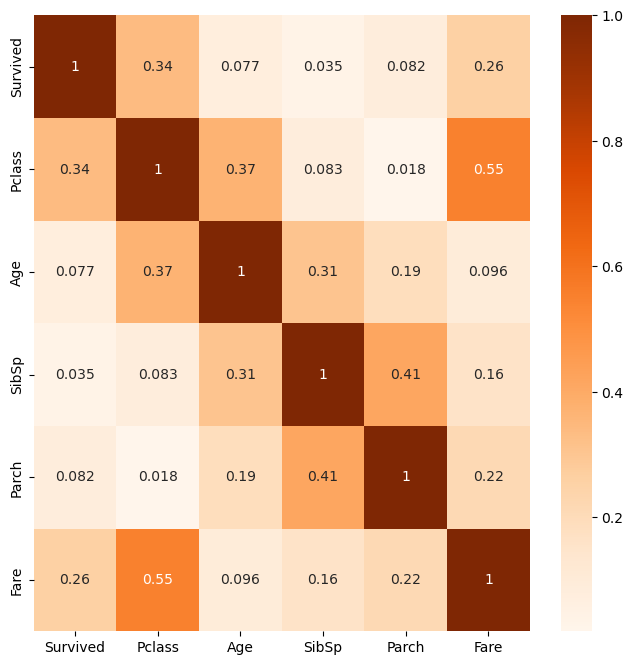

In [21]:
# 히트맵 표현
plt.figure(figsize = (8,8))
sns.heatmap(train.corr(numeric_only = True).abs(), annot = True, cmap = 'Oranges')

In [22]:
# train Pclass 컬럼
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [23]:
# 객실등급을 기준으로 그룹화 groupby(), 요금 컬럼 집계함수 중앙값 medean()

train[['Pclass', 'Fare']].groupby('Pclass').median()

,Fare
Pclass,
1,60.2875
2,14.2500
3,8.0500


In [24]:
# Pclass, Sex을 기준으로 그룹핑하여 Fare의 중앙값을 확인
train[['Pclass','Sex','Fare']].groupby(['Pclass','Sex']).median()

Fare
Pclass Sex             
1      female  82.66455
       male    41.26250
2      female  22.00000
       male    13.00000
3      female  12.47500
       male     7.92500

In [25]:
# 결측치가 있는 행 확인
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [26]:
# fillna를 사용해서 결측치 채기
test['Fare'] = test['Fare'].fillna(7.925)

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- train, test Age 채우기
    - 위에서 사용했던 Pclass, Sex컬럼을 그룹핑해서 Age의 집계를 확인하고 채워보자

In [29]:
# 평균값을 쓸지, 중앙값을 쓸지 판단을 위해 Age컬럼의 기술통계량을 확인
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [30]:
# Age는 Pclass와 상관관계가 높았음
# Pclass, Sex을 그룹핑하여 Age의 평균 출력
gb1 = train[['Pclass','Sex','Age']].groupby(['Pclass','Sex']).mean()
gb1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [31]:
# gb1 - index 2개 - Pclass , Sex
# 멀티인덱스
# 2등석, 남성 : 평균나이
gb1.loc[(2,'male')]

Age    30.740707
Name: (2, male), dtype: float64

In [32]:
# train Age 결측치가 있는 행 출력
train[train['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [33]:
gb1.loc[(2,'male')]

Age    30.740707
Name: (2, male), dtype: float64

In [34]:
# 규칙에 맞게 Pclass와 Sex에 따른 Age값 반환하는 함수
def fill_age(row):
    # row : 받아오는 행의 데이터 (매개변수)

    # 만약에 Age컬럼이 결측지라면~ gb1 테이블의 값을 인덱싱
    if np.isnan(row['Age']):
        return gb1.loc[(row['Pclass'],row['Sex'])]

    # 결측치가 아니라면~ 원래 나이 값을 사용
    else:
        return row["Age"]

In [35]:
gb1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [36]:
train['Age'] = train.apply(fill_age, axis = 1).astype(np.int64)

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


C:\Users\1\AppData\Local\Temp\ipykernel_14712\1129430468.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  train['Age'] = train.apply(fill_age, axis = 1).astype(np.int64)


In [37]:
test['Age'] = test.apply(fill_age, axis = 1).astype(np.int64)


test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


C:\Users\1\AppData\Local\Temp\ipykernel_14712\2898083411.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test['Age'] = test.apply(fill_age, axis = 1).astype(np.int64)


### 정리
- apply, fill_age
- 테스트 데이터를 행단위로 쪼갠거를 매개변수로 내줘서 안쪽 로직이 동작
- 결과값으로 Age를 채울 수 있는 대표값 반환
- 정수형으로 변환해서 데이터의 'Age' 컬럼에 넣어줌

- train, test Cabin 채우기
    - Cabin 컬럼 데이터 확인
    - 임의의 값으로 결측치를 채울 예정

In [40]:
# train 기준으로 데이터 확인
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [41]:
# 우선 임의의 값으로 train, test의 Cavin 결측치를 채워보자
# 'M'
train['Cabin'] = train['Cabin'].fillna('M')
test['Cabin'] = test['Cabin'].fillna('M')

In [42]:
# 첫글자 알파벳 1개만 추출하기
train['Deck'] = train['Cabin'].str[0]
# str : 데이터 내부 문자열에 접근

test['Deck'] = test['Cabin'].str[0]

# 컬럼 확인
train.columns, test.columns


(Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
        'Fare', 'Cabin', 'Embarked', 'Deck'],
       dtype='object'),
 Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
        'Cabin', 'Embarked', 'Deck'],
       dtype='object'))

In [43]:
# Cabin 컬럼 삭제
# .drop(컬럼명, axis = , inplace =)
# axis = 0 행삭제
# axis = 1 열삭제

train.drop('Cabin', axis = 1, inplace = True)

test.drop('Cabin', axis = 1, inplace = True)

- Deck 시각화

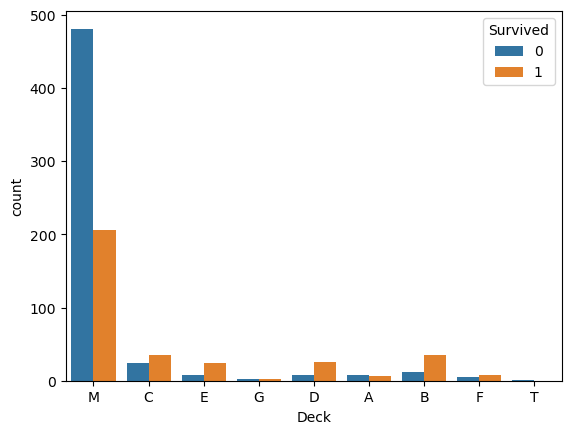

In [45]:
# sns 시각화 도구를 사용해서 범주형 데이터 Deck을 시각화 해보자
sns.countplot(data = train, x='Deck' , hue='Survived')
# countplot 개수 시각화
# x : x 축
# hue : 분할 기준(나타내고자 하는 것)
plt.show()

In [46]:
# M층에서는 상대적으로 사망률이 높다.
# 근데 M은 임의로 채워놓은 값이기 때문에, 다른 컬럼 참고

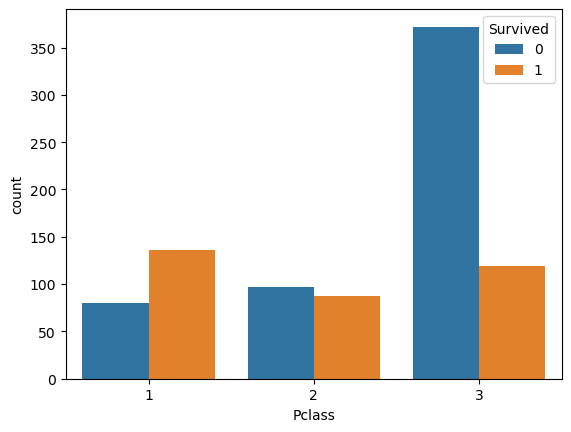

In [47]:
# Pclass가 사망에 얼마나 영향을 미쳤는지 시각화
sns.countplot(train, x = 'Pclass', hue = 'Survived')
plt.show()

- Deck과 Pclass 시각화
- x축 : Deck, hue : Pclass

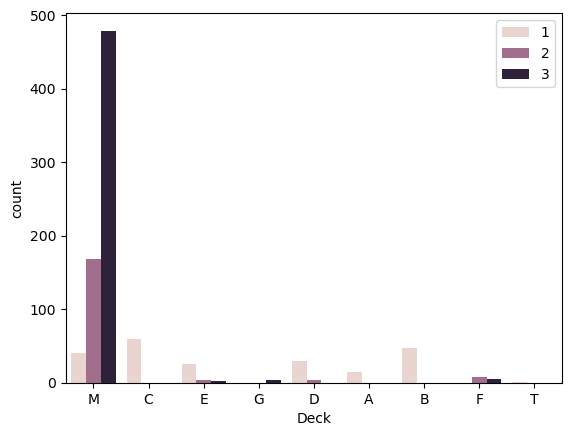

In [49]:
sns.countplot(data = train, x = 'Deck', hue = 'Pclass')
plt.legend()
plt.show()

In [50]:
# M층은 객실등급 3등석인 경우가 대부분임
# 그래서 상대적으로 사망률이 높았음
# M층 = Pclass가 3
# M이라는 데이터는 더이상 신경쓰지 않음. 3등석이기 때문에 사망률이 높았음.


- 성별에 따른 생존/사망 시각화

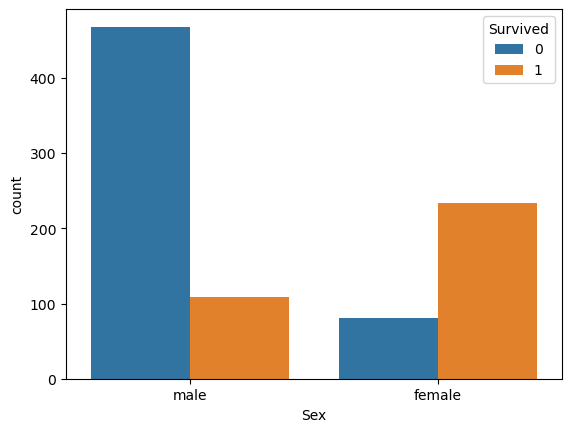

In [52]:
sns.countplot(data = train, x = 'Sex' , hue = 'Survived')
plt.show()

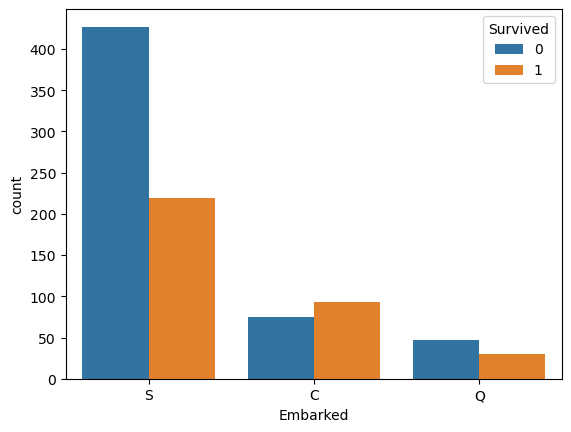

In [53]:
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')
plt.show()

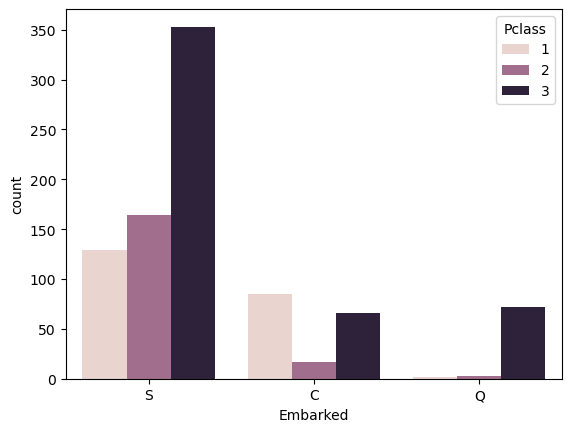

In [54]:
# S승선항에서 Pclass가 3인 사람이 많이 탄건 아닌가?
sns.countplot(data = train, x = 'Embarked',hue = 'Pclass')
plt.show()

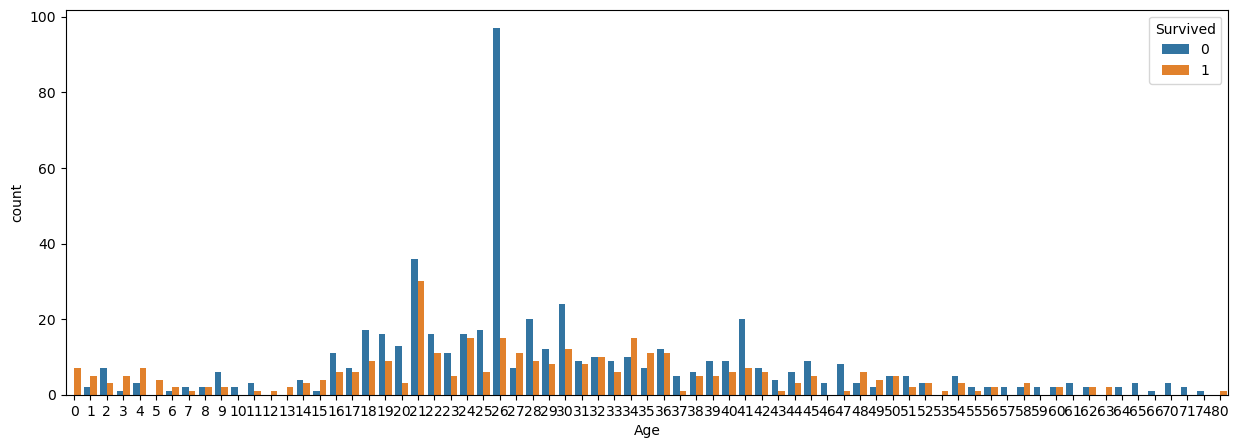

In [55]:
plt.figure(figsize=(15,5))
sns.countplot(data = train, x = 'Age', hue='Survived')
plt.show()

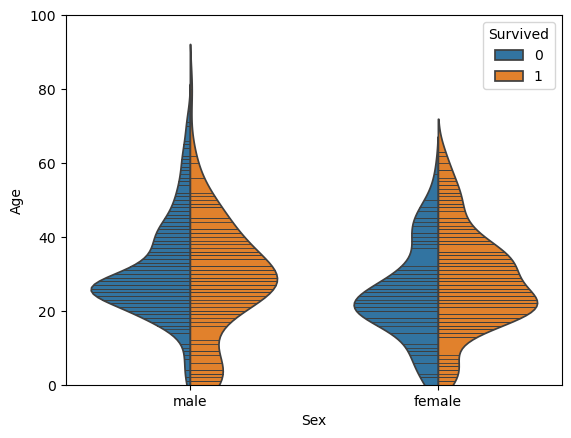

In [56]:
# 나이데이터를 countplot으로 시각화 했더니, 해석하기가 힘듦

# violinplot을 활용 : 수치형 데이터의 분포를 확인할 때 사용하는 그래프
# 바이올린 형태로 데이터의 분포와 밀도를 곡선으로 표현한 그래프
# 데이터 많이 존재하는 부분은 두껍게
# 데이터가 적게 존재하는 부분은 얇게

# 성별과 나이에 따른 생존/사망자 수
sns.violinplot(
    data = train,
    x = 'Sex',
    y = 'Age',
    hue = 'Survived',
    split = True, # 데이터를 양쪽에 나눠서 표현
    inner = 'stick' # 바이올린 내부에 개별 데이터선   
)

plt.ylim(0,100)
plt.show()

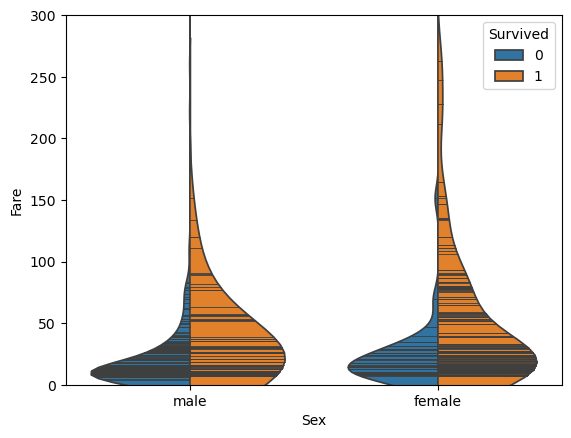

In [57]:
# Sex와 Fare에 따른 Survived 시각화
sns.violinplot(
    data = train,
    x = 'Sex',
    y = 'Fare',
    hue = 'Survived',
    split = True, # 데이터를 양쪽에 나눠서 표현
    inner = 'stick' # 바이올린 내부에 개별 데이터선   
)

plt.ylim(0,300)
plt.show()

In [58]:
# 성별 불문, 요금이 저렴한 사람들의 사망률이 높았다.

- 특성공학 : 새로운 컬럼 생성(trainsform)
    - Parch, SibSp를 더해서 가족의 숫자라는 새로운 칼럼 생성
    - train , test 동일하게 적용

In [60]:
# train
train['Family-Size'] = train['Parch'] + train['SibSp'] + 1 # 본인 포함
train['Family-Size']

PassengerId
1      2
2      2
3      1
4      2
5      1
      ..
887    1
888    1
889    4
890    1
891    1
Name: Family-Size, Length: 891, dtype: int64

In [61]:
# test
test['Family-Size'] = test['Parch'] + test['SibSp'] + 1 # 본인 포함
test['Family-Size']

PassengerId
892     1
893     2
894     1
895     1
896     3
       ..
1305    1
1306    1
1307    1
1308    1
1309    3
Name: Family-Size, Length: 418, dtype: int64

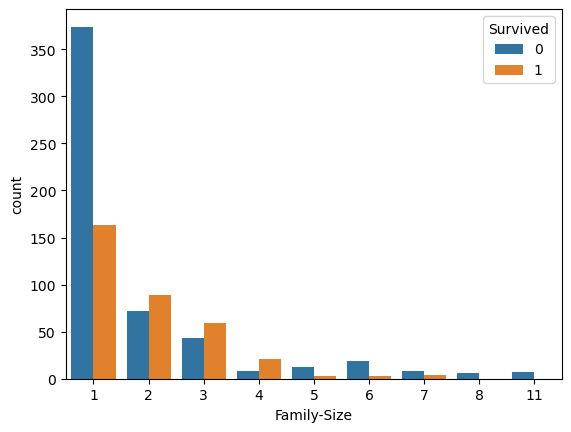

In [62]:
# 시각화
sns.countplot(data = train, x = 'Family-Size' , hue = 'Survived' )
plt.show()

In [63]:
# 1명일 경우, 사망률이 높다. - alone
# 2명 ~ 4명일 경우, 생존률이 높음 - small
# 5명 이상일 경우, 사망률이 높음 - large

- 가족의 사이즈가 1이면 Alone, 2 ~ 4명이면 Small, 5명이상이면 Large로 바꿔줌
- train, test 둘 다 변경

In [65]:
bins = [0,1,4,11]
# (0, 1] -> 0 초과 1 이하
# (1, 4] -> 1 초과 4 이하
# (4, 11] -> 4 초과 11 이하

labels = ['Alone', 'Small', 'Large']

# cut : 연속적인 수치형 데이터를 일정 범위로 나누어줌 -> 범주형
train['Family_group'] = pd.cut(train['Family-Size'], bins = [0,1,4,11], labels = ['Alone', 'Small', 'Large'])

In [66]:
# test 데이터도 binning
test['Family_group'] = pd.cut(test['Family-Size'], bins = [0,1,4,11], labels = ['Alone', 'Small', 'Large'])

In [67]:
train['Family_group']

PassengerId
1      Small
2      Small
3      Alone
4      Small
5      Alone
       ...  
887    Alone
888    Alone
889    Small
890    Alone
891    Alone
Name: Family_group, Length: 891, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

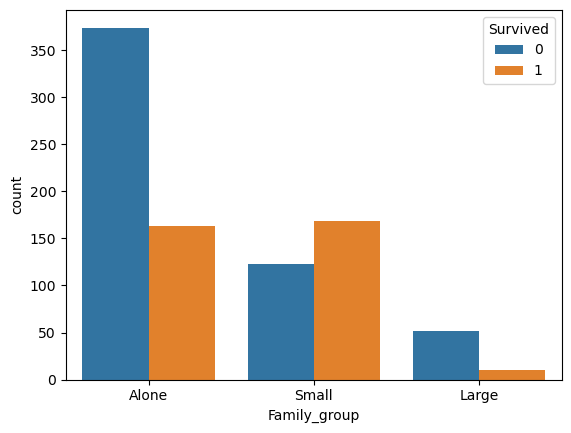

In [68]:
# Family-group 시각화

sns.countplot(
    data = train,
    x = 'Family_group',
    hue = 'Survived'    
)
plt.show()

- 불필요한 컬럼 삭제
    - drop
    - 전처리 대상에서 제외된 컬럼과 특성공학 후 불필요해진 컬럼

In [70]:
train.info()
# 삭제대상
# 전처리 후 필요없어진 컬럼
# 전처리 하지 않은 컬럼 중, 불필요한 컬럼

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    int64   
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Embarked      891 non-null    object  
 10  Deck          891 non-null    object  
 11  Family-Size   891 non-null    int64   
 12  Family_group  891 non-null    category
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 91.5+ KB


In [71]:
train.drop( ['Name','Ticket','SibSp','Parch','Family-Size'], axis = 1, inplace=True )
test.drop( ['Name','Ticket','SibSp','Parch','Family-Size'], axis = 1, inplace=True )

In [72]:
train.shape, test.shape

((891, 8), (418, 7))

- train에는 정답데이터와 문제데이터가 하나의 프레임으로 들어가있는 상태(X-train, y_train)
- test는 정답을 제공하지 않음 (X_test)

In [74]:
X_train = train.drop('Survived', axis = 1)
y_train = train['Survived']

X_test = test

print(X_train.shape, y_train.shape)
print(X_test.shape)

(891, 7) (891,)
(418, 7)


In [75]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Family_group
PassengerId,,,,,,,,
1,0,3,male,22,7.2500,S,M,Small
2,1,1,female,38,71.2833,C,C,Small
3,1,3,female,26,7.9250,S,M,Alone
4,1,1,female,35,53.1000,S,C,Small
5,0,3,male,35,8.0500,S,M,Alone
...,...,...,...,...,...,...,...,...
887,0,2,male,27,13.0000,S,M,Alone
888,1,1,female,19,30.0000,S,B,Alone
889,0,3,female,21,23.4500,S,M,Small


- 범주형 데이터는 학습용으로 사용할 수 없으니. 수치형 변환
- Encoding
- 구분 용도를 위해 one-hot-Encoding

In [77]:
X_train_one_hot = pd.get_dummies(X_train) 
X_test_one_hot = pd.get_dummies(X_test)

In [78]:
X_train_one_hot.shape

(891, 20)

In [79]:
X_test_one_hot.shape

(418, 19)

In [80]:
X_train_one_hot.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T', 'Family_group_Alone',
       'Family_group_Small', 'Family_group_Large'],
      dtype='object')

In [81]:
X_test_one_hot.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_group_Alone',
       'Family_group_Small', 'Family_group_Large'],
      dtype='object')

- 특성 개수 맞추기
  - 부족한 컬럼명을 확인
  - set() 집합 자료구조 활용해서 찾아보기

In [83]:
# set이라는 데이터 타입(집합 자료형)
set(X_train_one_hot.columns) - set(X_test_one_hot.columns)

{'Deck_T'}

In [84]:
# X_test에 Deck_T라는 컬럼을 새롭게 추가
X_test_one_hot['Deck_T'] = 0
X_test_one_hot['Deck_T']

PassengerId
892     0
893     0
894     0
895     0
896     0
       ..
1305    0
1306    0
1307    0
1308    0
1309    0
Name: Deck_T, Length: 418, dtype: int64

In [85]:
X_test_one_hot.info()
X_train_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              418 non-null    int64  
 1   Age                 418 non-null    int64  
 2   Fare                418 non-null    float64
 3   Sex_female          418 non-null    bool   
 4   Sex_male            418 non-null    bool   
 5   Embarked_C          418 non-null    bool   
 6   Embarked_Q          418 non-null    bool   
 7   Embarked_S          418 non-null    bool   
 8   Deck_A              418 non-null    bool   
 9   Deck_B              418 non-null    bool   
 10  Deck_C              418 non-null    bool   
 11  Deck_D              418 non-null    bool   
 12  Deck_E              418 non-null    bool   
 13  Deck_F              418 non-null    bool   
 14  Deck_G              418 non-null    bool   
 15  Deck_M              418 non-null    bool   
 16  Family_gro

In [86]:
X_train_one_hot.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T', 'Family_group_Alone',
       'Family_group_Small', 'Family_group_Large'],
      dtype='object')

In [190]:
# X_train과 X_test의 컬럼 순서가 다르다.
# X_train컬럼의 순서로 맞춰준다.
X_test_one_hot = X_test_one_hot[X_train_one_hot.columns]

In [88]:
print(X_train_one_hot.shape, y_train.shape)
print(X_test_one_hot.shape)

(891, 20) (891,)
(418, 20)


#### 모델 선택 및 학습

In [171]:
# 필요한 라이브러리 가져오기
from sklearn.tree import DecisionTreeClassifier
# 교차검증
from sklearn.model_selection import cross_val_score

In [173]:
# 모델 객체 생성
tree_model = DecisionTreeClassifier()

In [175]:
cv_result = cross_val_score(tree_model, X_train_one_hot, y_train, cv = 5)
cv_result

array([0.73184358, 0.78089888, 0.84831461, 0.76404494, 0.78651685])

In [179]:
cv_result.mean()
# 평균적으로 78%의 성능을 내고 있음.
# test데이터에서는 조금 더 정확도가 떨어질 수 있다.

0.7823237712635742

- tree model의 하이퍼 파라미터 조정

In [182]:
tree_model = DecisionTreeClassifier(max_depth= 3)
# 교차검증
result = cross_val_score(tree_model, X_train_one_hot, y_train, cv = 5)
result

array([0.81005587, 0.81460674, 0.80337079, 0.78089888, 0.80337079])

In [184]:
result.mean()

0.8024606113866047

In [313]:
# 교차검증을 하면서 하이퍼 파라미터 조정 확인(1~9)
for md in range(1,10):
    tree_model = DecisionTreeClassifier(max_depth = md)
    result = cross_val_score(tree_model, X_train_one_hot, y_train, cv = 5)
    print(f'depth : {md}', result.mean())

depth : 1 0.7867365513778168
depth : 2 0.773316176009039
depth : 3 0.8013370158809867
depth : 4 0.8081288054736049
depth : 5 0.8148201619484026
depth : 6 0.8148264390182662
depth : 7 0.8148264390182662
depth : 8 0.8159500345238844
depth : 9 0.8081099742640134


In [319]:
tree_model2 = DecisionTreeClassifier(max_depth= 7)

# 학습
tree_model2.fit(X_train_one_hot, y_train)

# 예측값
pre2 = tree_model2.predict(X_test_one_hot)

# 모델 답안지 작성 - tree_model_(num).csv
result2 = pd.read_csv('./data/gender_submission.csv')
result2['Survived'] = pre2
result2.to_csv('data/tree_model_01.csv', index = False)

In [194]:
# tree_model2가 어떤 특성을 중요하게 생각하는지, 특성 중요도 확인

In [220]:
fi = tree_model2.feature_importances_
fi

array([0.12587444, 0.11648766, 0.08001609, 0.        , 0.50258411,
       0.00301714, 0.        , 0.0083284 , 0.        , 0.        ,
       0.00403921, 0.        , 0.01510388, 0.        , 0.        ,
       0.05694591, 0.        , 0.        , 0.02776957, 0.05983358])

In [222]:
fi_s = pd.DataFrame(fi, index = X_train_one_hot.columns, columns = ['imp'])
fi_s

,imp
Pclass,0.125874
Age,0.116488
Fare,0.080016
Sex_female,0.000000
Sex_male,0.502584
Embarked_C,0.003017
Embarked_Q,0.000000
Embarked_S,0.008328
Deck_A,0.000000
Deck_B,0.000000


<Figure size 500x500 with 0 Axes>

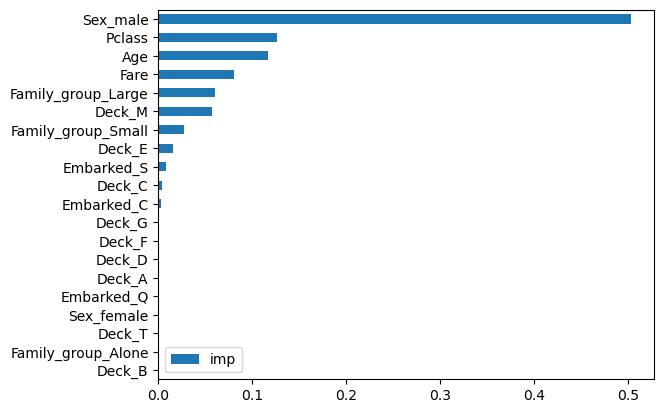

In [224]:
plt.figure(figsize = (5,5))
fi_s.sort_values('imp', ascending = True).plot.barh()
plt.show()

### 앙상블
- 여러 모델을 결합하는 방식으로 성능을 올리는 기법
     - 1. 보팅(voting)
          - 여러개의 다른 종류의 모델이 예측한 결과를 투표 혹은 평균을 통해 최종 결정
            A. 하드보팅(Hard-Voting) : 투표 : (다수결)
            B. 소프트보팅(Soft-Voting) : 확률값을 통한 결정
     - 2. 백깅(Bagging)
          - 여러개의 같은 종류의 모델이 예측한 결과를 투표 혹은 평균을 통해 최종 결정
          - 대표 모델 : RandomForest (Decision Tree를 여러개 사용하는 모델 )
     - 3. 부스팅(Boostring)
          - 여러 모델을 순차적으로 학습을 시켜 이전 모델의 오류를 보장
          - AdaBoost, GradientBoost
          - 후속 모델이 이전 모델의 잘못된 예측을 수정하면서 성능이 점점 좋아지는 현상 

In [228]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### 랜덤포레스트

In [693]:
forest_model = RandomForestClassifier(n_estimators= 170, #트리의 개수)
                                      max_features= 10, # 각각의 트리가 선택할 특성개수의 최대
                                     max_depth = 4,
                                     random_state=11)

In [699]:
forest_model.fit(X_train_one_hot, y_train)
pre2 = forest_model.predict(X_test_one_hot)
result2 = pd.read_csv('./data/gender_submission.csv')
result2['Survived'] = pre2
result2.to_csv('data/tree_model_01.csv', index = False)

In [695]:
# 랜덤포레스트 모델 교차검증
result_RF = cross_val_score(forest_model,
                      X_train_one_hot,
                        y_train,
                        cv=5)

result_RF
#forest_model.fit(X_train_one_hot, y_train)
#pre2 = forest_model.predict(X_test_one_hot)
#result2 = pd.read_csv('./data/gender_submission.csv')
#result2['Survived'] = pre2
#result2.to_csv('data/tree_model_01.csv', index = False)

array([0.82681564, 0.81460674, 0.81460674, 0.80337079, 0.84831461])

In [402]:
pre2

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [697]:
result_RF.mean()

0.821542903772519

### 에이다 부스팅

In [238]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=14)

In [242]:
result_ada = cross_val_score(ada_model,
                            X_train_one_hot,
                            y_train,
                            cv=5)
result_ada

C:\Users\1\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\1\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\1\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\1\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\1\anaconda3\Lib\sit

array([0.78212291, 0.80337079, 0.80898876, 0.83707865, 0.83707865])

In [244]:
result_ada.mean()

0.8137279517921033

## 보팅

In [249]:
voting_model = VotingClassifier(estimators=[('tree', tree_model2),
                                           ('forest', forest_model),
                                           ('ada', ada_model)],
                                            voting = 'soft'
                               )
voting_model

VotingClassifier(estimators=[('tree', DecisionTreeClassifier(max_depth=6)),
                             ('forest',
                              RandomForestClassifier(max_depth=4,
                                                     max_features=5,
                                                     random_state=11)),
                             ('ada',
                              AdaBoostClassifier(n_estimators=100,
                                                 random_state=14))],
                 voting='soft')

In [253]:
# 교차검증
result_voting = cross_val_score(voting_model,
                               X_train_one_hot,
                               y_train,
                               cv=5)
result_voting

C:\Users\1\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\1\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\1\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\1\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\1\anaconda3\Lib\sit

array([0.82122905, 0.80337079, 0.83146067, 0.79775281, 0.84269663])

In [255]:
result_voting.mean()

0.8193019898311468

## xgboost, lightgbm


In [259]:
# xgboost 설치
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   - -------------------------------------- 4.5/150.0 MB 29.7 MB/s eta 0:00:05
   -- ------------------------------------- 10.7/150.0 MB 30.5 MB/s eta 0:00:05
   ---- ----------------------------------- 17.6/150.0 MB 31.6 MB/s eta 0:00:05
   ------ --------------------------------- 25.4/150.0 MB 32.2 MB/s eta 0:00:04
   -------- ------------------------------- 32.5/150.0 MB 33.3 MB/s eta 0:00:04
   ---------- ----------------------------- 37.7/150.0 MB 32.0 MB/s eta 0:00:04
   ----------- ---------------------------- 41.7/150.0 MB 29.8 MB/s eta 0:00:04
   ------------ --------------------------- 48.0/150.0 MB 30.2 MB/s eta 0:00:04
   -------------- ------------------------- 52.7/150.0 MB 28.9 MB/s eta 0:00:04
   -------------- ------------------------- 54.8/150.0 MB 28.1 MB/s eta 0:00:04
   ---------------- ----------------------- 61.9/150.0 MB 27.8 MB/s eta 0:00:04
   ----------------- ---------------------- 67.4/1

In [261]:
# light bgm 설치
! pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 38.4 MB/s eta 0:00:00


In [263]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [267]:
xg_model = XGBClassifier(n_estimators = 100, random_state = 13)
xg_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [287]:
y_train.info() 

<class 'pandas.core.series.Series'>
Index: 891 entries, 1 to 891
Series name: Survived
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 13.9+ KB


In [291]:
y_train = y_train.astype('int')
y_train.info()

<class 'pandas.core.series.Series'>
Index: 891 entries, 1 to 891
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int32
dtypes: int32(1)
memory usage: 10.4 KB


In [298]:
result_xg = cross_val_score(xg_model,
                           X_train_one_hot,
                           y_train,
                           cv=5)
result_xg

array([0.79329609, 0.79775281, 0.84831461, 0.78089888, 0.83707865])

### LightGBM

In [296]:
lgb_model = LGBMClassifier(n_estimators=100, random_state=55)

In [300]:
result_lgb = cross_val_score(lgb_model,
                           X_train_one_hot,
                           y_train,
                           cv=5)
result_lgb

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

array([0.79888268, 0.81460674, 0.84831461, 0.80898876, 0.85955056])

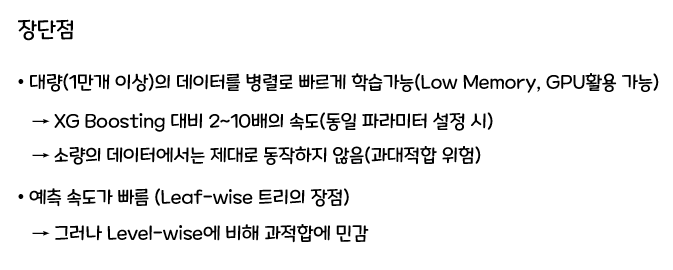

In [303]:
result_lgb.mean()

0.8260686711443098